In [1]:
import pandas as pd
# Our scripts
import sys  
sys.path.insert(0, '../src')
import sparsity_analysis as spa
%load_ext autoreload
%autoreload 2

## How K_ac sparsity affects population structure

### Produce dataframe of model dynamics with different sparse matrices

In [2]:
sizes = list(range(3,8))
num = 250
lower, upper = 0.001, 0.01
def sparsity(n): 
    return 0.5
end_time = 200

results = spa.analyze(sizes,
                      num,
                      lower,
                      upper,
                      sparsity,
                      end_time)
print(results.shape)
results.to_csv('../Data/sparsity_analysis.tsv', sep='\t', index=False)
results.head()

size:   0%|          | 0/5 [00:00<?, ?it/s]

sparsity:   0%|          | 0/4 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

sparsity:   0%|          | 0/8 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

sparsity:   0%|          | 0/12 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

sparsity:   0%|          | 0/18 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

sparsity:   0%|          | 0/24 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

init:   0%|          | 0/250 [00:00<?, ?it/s]

(16500, 9)


,total,growth_rate,has_grown,euclidian,shannon_index,bray_curtis,init,sparsity,size
0,0.043800,0.004681,0.666667,0.022873,-0.298859,0.344130,0,0.111111,3
1,0.043786,0.004143,0.666667,0.015875,-0.170072,0.082347,1,0.111111,3
2,0.042950,0.004930,0.666667,0.024645,-0.141111,0.513806,2,0.111111,3
3,0.043616,0.005252,0.666667,0.023237,-0.269089,0.380659,3,0.111111,3
4,0.043881,0.007216,0.666667,0.026531,-0.350274,0.341461,4,0.111111,3


In [3]:
df = pd.read_csv('../Data/sparsity_analysis.tsv', sep='\t')
ids = ['init', 'sparsity', 'size']
df = pd.melt(df,
             id_vars=ids,
             var_name='statistic',
             value_name='value')
df.head()

,init,sparsity,size,statistic,value
0,0,0.111111,3,total,0.043800
1,1,0.111111,3,total,0.043786
2,2,0.111111,3,total,0.042950
3,3,0.111111,3,total,0.043616
4,4,0.111111,3,total,0.043881


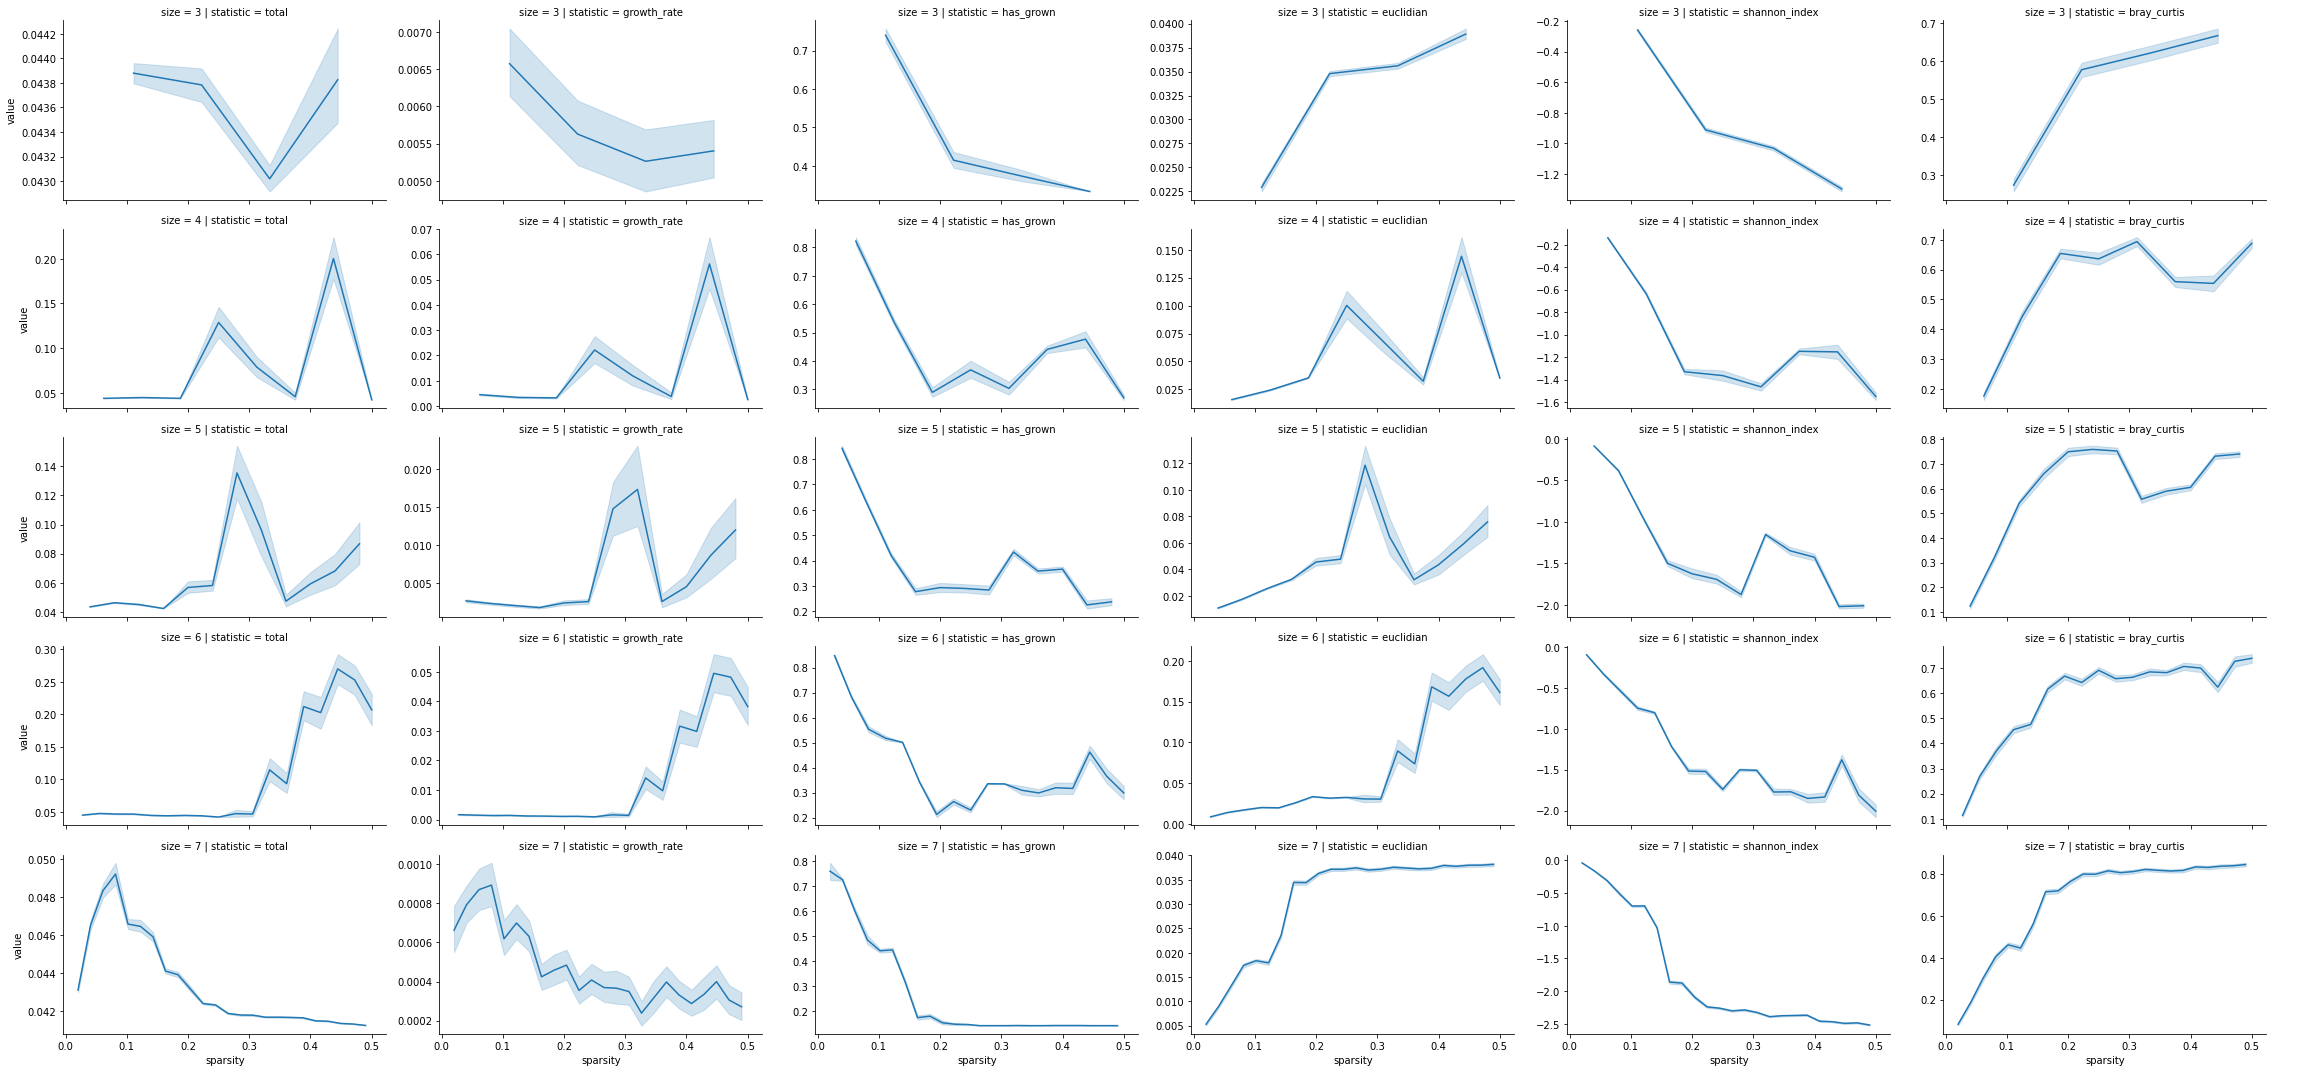

In [5]:
import seaborn as sns
pdf = df #df[df['size'] != 4] 
pdf = pdf[pdf['statistic'] != 'skew']
plot = sns.FacetGrid(pdf, col='statistic', row='size',
                     sharex=True, sharey=False, aspect=16/9)
plot.map_dataframe(sns.lineplot, x='sparsity', y='value')
plot.add_legend()
plot.tight_layout()
plot.fig.savefig('../Documents/figures/sparsity_analysis.png')